In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# load a single file as a numpy array
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

def to_categorical(y, num_classes=None, dtype='float32'):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    # Example
    ```python
    # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
    > labels
    array([0, 2, 1, 2, 0])
    # `to_categorical` converts this into a matrix with as many
    # columns as there are classes. The number of rows
    # stays the same.
    > to_categorical(labels)
    array([[ 1.,  0.,  0.],
           [ 0.,  0.,  1.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.],
           [ 1.,  0.,  0.]], dtype=float32)
    ```
    """

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

# load data set and split into training and testing inputs (X) and outputs (y)
trainX, trainy, testX, testy = load_dataset("C:/Users/user/Downloads/")

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed

(7352, 128, 9) (7352, 1)


C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed

(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


C:\Users\user\AppData\Local\Temp\ipykernel_3016\2233135649.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class CNNLSTMModel(nn.Module):
    def __init__(self, n_timesteps, n_features, n_outputs, hidden_dim=100, layer_dim=1):
        super(CNNLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        # 입력 데이터의 timesteps를 고려해 CNN 후 LSTM으로 넘기기 전의 크기 조정
        self.n_timesteps = n_timesteps // 4  # 2번의 MaxPooling으로 인해 시간 축이 1/4로 줄어듦
        self.n_features_after_conv = 128 * (n_features // 4)  # 각 MaxPooling 후의 feature 차원
        
        self.conv1 = nn.Conv2d(1, 64, kernel_size=(3, 3), padding=(1, 1))
        self.conv2 = nn.Conv2d(64, 128, kernel_size=(3, 3), padding=(1, 1))
        self.pool = nn.MaxPool2d((2, 2))
        
        # LSTM의 입력 차원은 conv2의 출력 차원과 같음
        self.lstm = nn.LSTM(self.n_features_after_conv, hidden_dim, layer_dim, batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, n_outputs)

    def forward(self, x):
        # Convolutional layers
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # Conv2D 후의 데이터 형태를 LSTM에 맞게 조정
        x = x.permute(0, 2, 1, 3).contiguous().view(-1, self.n_timesteps, self.n_features_after_conv)
        
        # LSTM layer
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        x, (hn, cn) = self.lstm(x, (h0, c0))
        
        # Fully connected layer
        x = self.fc(x[:, -1, :])  # 마지막 시간 단계의 출력만 사용
        return x


hidden_dim = 100  # 예: LSTM 층의 히든 상태의 차원
layer_dim = 1

# Parameters and device setup
n_timesteps, n_features = trainX.shape[1], trainX.shape[2]  # Defined based on the loaded dataset dimensions
n_outputs = trainy.shape[1]  # Output classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model instantiation
model = CNNLSTMModel(n_timesteps, n_features, n_outputs, hidden_dim, layer_dim)
model.to(device)

# Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Preparing the dataset for training/testing
# Adding an extra dimension for channel to fit the CNN input requirement
trainXT = torch.tensor(np.expand_dims(trainX, axis=1), dtype=torch.float32).to(device)  # Add channel dimension
trainyT = torch.tensor(np.argmax(trainy, axis=1), dtype=torch.long).to(device)  # Convert from one-hot
testXT = torch.tensor(np.expand_dims(testX, axis=1), dtype=torch.float32).to(device)
testyT = torch.tensor(np.argmax(testy, axis=1), dtype=torch.long).to(device)


In [16]:
import numpy as np

num_epochs = 100
batch_size = 32

# For tracking the training progress
loss_list_epoch = []
acc_list_epoch = []
test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    correct_sum = 0
    total = 0

    for i in range(int(np.ceil(len(trainXT) / batch_size))):
        indices = slice(i * batch_size, (i + 1) * batch_size)
        inputs, labels = trainXT[indices], trainyT[indices]
        
        optimizer.zero_grad()  # Clear gradients for this training step
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Apply gradients

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct_sum += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = train_loss / total  # Average training loss for the epoch
    avg_train_acc = correct_sum / total  # Average training accuracy for the epoch
    loss_list_epoch.append(avg_train_loss)
    acc_list_epoch.append(avg_train_acc)

    # Evaluation on the test set
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct_t = 0
    total_t = 0
    with torch.no_grad():  # No need to compute gradients (for validation data)
        for i in range(int(np.ceil(len(testXT) / batch_size))):
            indices = slice(i * batch_size, (i + 1) * batch_size)
            inputs, labels = testXT[indices], testyT[indices]
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct_t += (predicted == labels).sum().item()
            total_t += labels.size(0)
    
    avg_test_loss = test_loss / total_t  # Average test loss for the epoch
    avg_test_acc = correct_t / total_t  # Average test accuracy for the epoch
    test_loss_list.append(avg_test_loss)
    test_acc_list.append(avg_test_acc)

    # Print statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.4f}')


Epoch [1/100], Loss: 1.4245, Accuracy: 0.4334, Test Loss: 0.9035, Test Accuracy: 0.6434
Epoch [2/100], Loss: 0.7805, Accuracy: 0.6774, Test Loss: 0.7515, Test Accuracy: 0.6987
Epoch [3/100], Loss: 0.7713, Accuracy: 0.6659, Test Loss: 0.7695, Test Accuracy: 0.6698
Epoch [4/100], Loss: 0.6705, Accuracy: 0.7243, Test Loss: 0.8175, Test Accuracy: 0.6176
Epoch [5/100], Loss: 0.5832, Accuracy: 0.7432, Test Loss: 0.6851, Test Accuracy: 0.7262
Epoch [6/100], Loss: 0.5401, Accuracy: 0.7671, Test Loss: 0.6121, Test Accuracy: 0.7462
Epoch [7/100], Loss: 0.4944, Accuracy: 0.8047, Test Loss: 0.6246, Test Accuracy: 0.7418
Epoch [8/100], Loss: 0.4524, Accuracy: 0.8244, Test Loss: 0.6151, Test Accuracy: 0.7598
Epoch [9/100], Loss: 0.4767, Accuracy: 0.8141, Test Loss: 0.5890, Test Accuracy: 0.7526
Epoch [10/100], Loss: 0.4376, Accuracy: 0.8154, Test Loss: 0.5843, Test Accuracy: 0.7676
Epoch [11/100], Loss: 0.4068, Accuracy: 0.8451, Test Loss: 0.5606, Test Accuracy: 0.7710
Epoch [12/100], Loss: 0.3870, 

In [17]:
# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc_list_epoch, label='Training Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlim(0,100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_list_epoch, label='Training Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

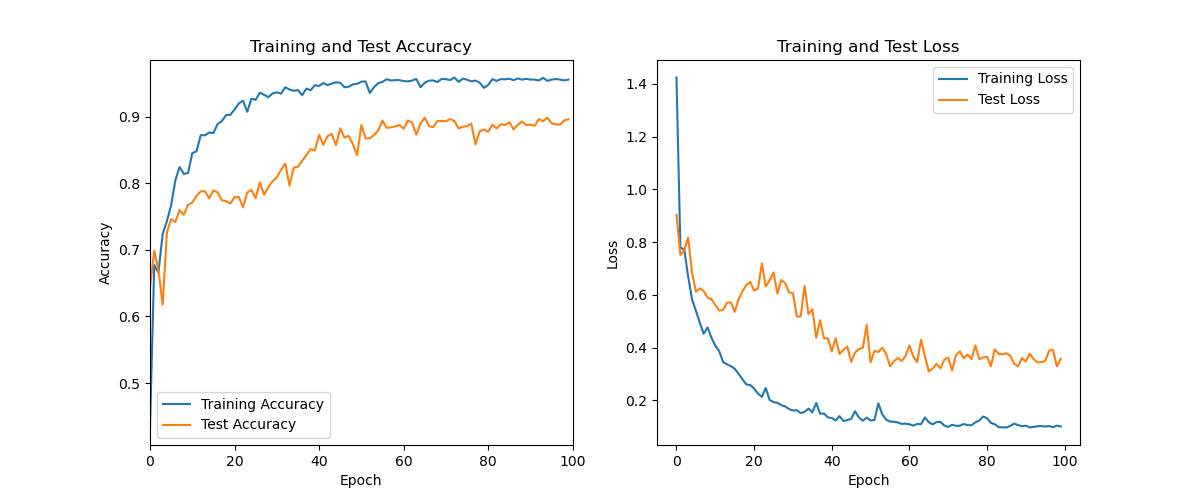

In [18]:
from IPython.display import Image

image_path = "C:/Users/user/OneDrive/바탕 화면/test5.png"
Image(filename=image_path)

#오버피팅 발생 ....